In [20]:
import ot
import ot.plot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
data = pd.read_csv('Langevin_1D.csv', header=None)

max:  1.72518730163574
min:  -1.74645888805389


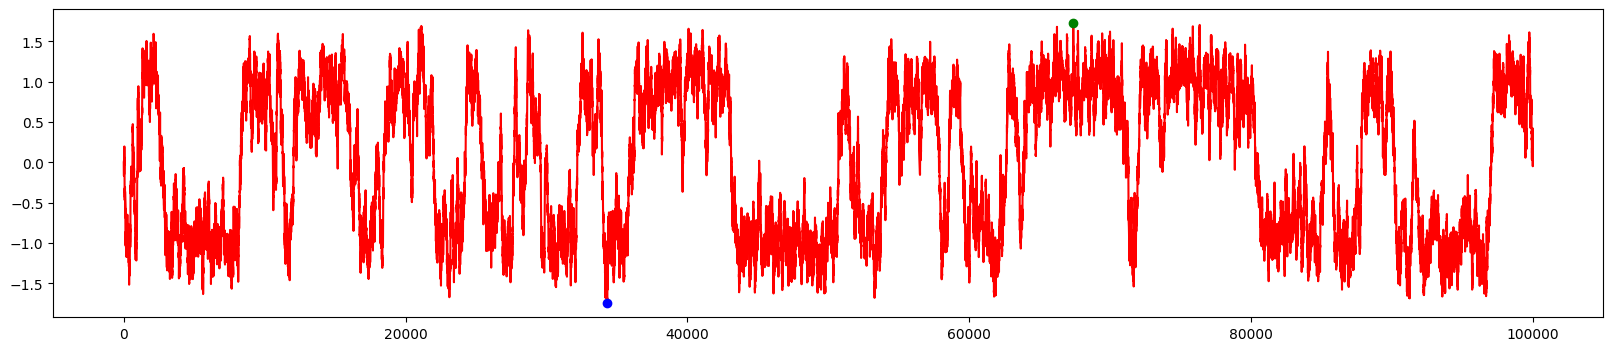

In [101]:
#Plot out data

plt.figure(1, figsize=(20, 4))
plt.plot(data, 'r')

plt.plot(np.argmax(data[0]), max(data[0]), 'og')
plt.plot(np.argmin(data[0]), min(data[0]), 'ob')
print("max: ", max(data[0]))
print("min: ", min(data[0]))

1000


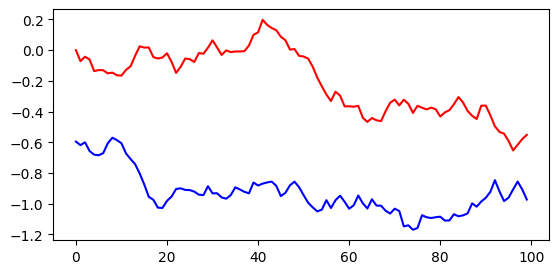

In [84]:
plt.figure(1, figsize=(6.4, 3))

#Split data into discrete trajectory bins by time steps
time_bins = np.array_split(np.array(data), 1000)

print(len(time_bins))

In [91]:
#Calculate Wasserstein distance between two time steps
def Wasserstein_distance(ts1, ts2, start, stop, size):
    if (ts1 > ts2):
        return "error"
    
    a = plt.hist(time_bins[ts1], range=(start,stop), bins=size)
    b = plt.hist(time_bins[ts2], range=(start,stop), bins=size)
    
    M = ot.dist(time_bins[ts1],time_bins[ts2])
    
    #Wd = ot.emd2(a[0]/size, b[0]/size, M)
    Wd = ot.emd2(a[0], b[0], M)
    
    return Wd

#Plot distribution of two adjacent time bins
def compare_dist(ts1, ts2):
    if (ts1 > ts2):
        return "error"
    
    sns.distplot(time_bins[ts1],bins=100,kde=True)
    sns.distplot(time_bins[ts2],bins=100,kde=True)

#Plot trajectory of two adjacent time bins
def compare_traj(ts1,ts2): 
    if (ts1 > ts2):
        return "error"
    
    plt.plot(time_bins[ts1], 'b')
    plt.plot(time_bins[ts2], 'orange')

98.71253871115631

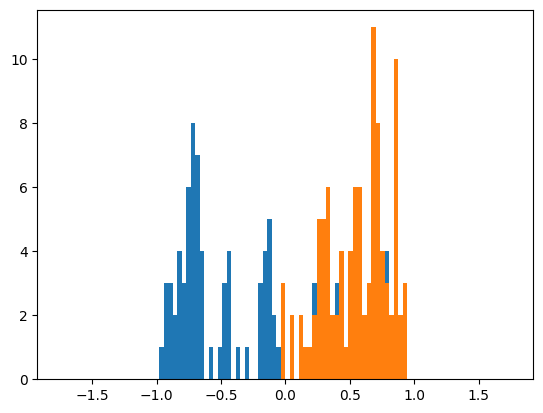

In [110]:
Wasserstein_distance(9, 10, -1.75, 1.75, 100)

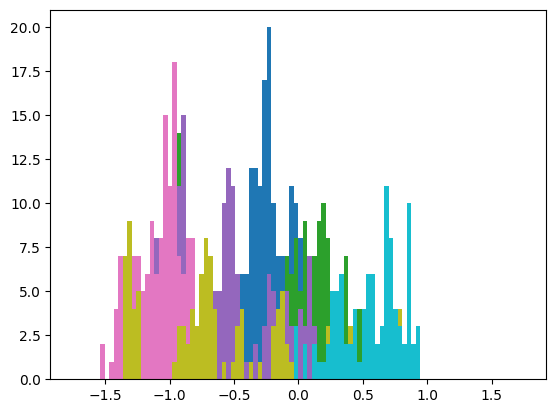

In [102]:
dist = []
for i in range(0,10):
    wd = Wasserstein_distance(i, i+1, -1.75, 1.75, 100)
    dist.append(wd)

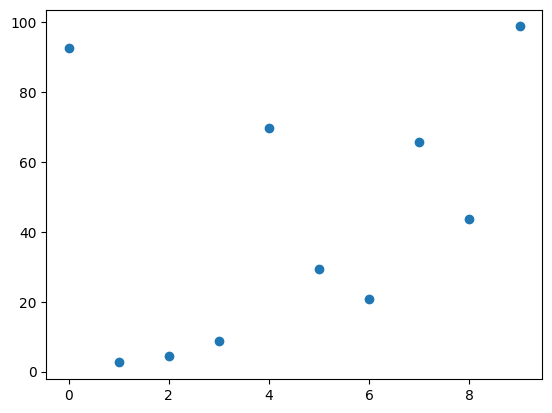

In [104]:
plt.plot(dist, 'o')

/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


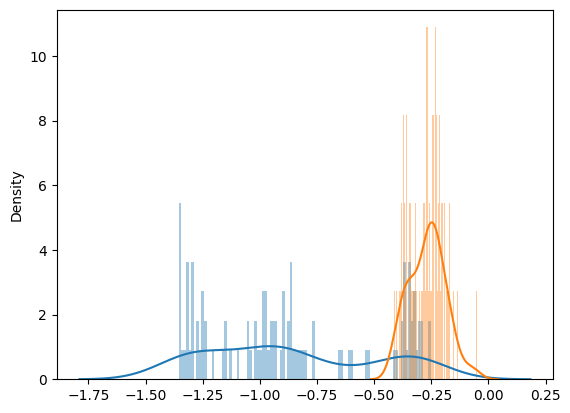

In [112]:
#blue earlier time step, orange later time step
compare_dist(4,5)

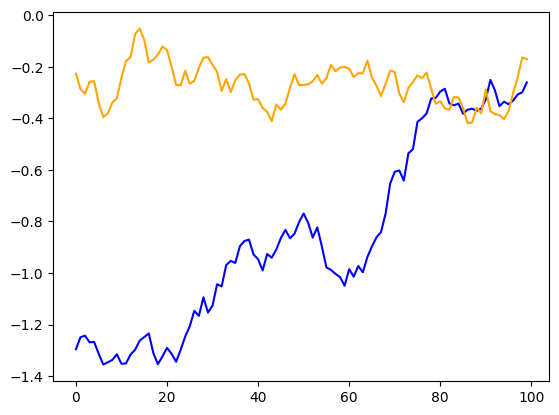

In [113]:
#blue earlier time step, orange later time step
compare_traj(4,5)